In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
df = pd.read_csv("D:/Labs/Pulsar.csv",sep=",")
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
minMaxScaler = MinMaxScaler()
df_enc = pd.DataFrame(minMaxScaler.fit_transform(df))
df_enc.shape

(17898, 9)

In [4]:
x = df_enc
y = pd.DataFrame(df['Class'],columns=['Class'])

In [5]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.3)
yTrain = pd.get_dummies(data=yTrain,columns =['Class'])
yTest = pd.get_dummies(data=yTest,columns =['Class'])

In [6]:
model_nn = keras.Sequential([keras.layers.Dense(20,kernel_initializer = 'he_uniform',input_shape=(9,),activation = 'relu'),
                            keras.layers.Dense(30,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(40,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(2,kernel_initializer = 'glorot_uniform',activation = 'sigmoid'),
                            ])

model_nn.compile(loss = "binary_crossentropy",metrics = ['accuracy'],optimizer = 'SGD')
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 10)

Epoch 1/10
392/392 [==============================] - 1s 2ms/step - loss: 0.2606 - accuracy: 0.9134 - val_loss: 0.1062 - val_accuracy: 0.9592
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.9877 - val_loss: 0.0364 - val_accuracy: 0.9989
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: 0.0251 - accuracy: 0.9999 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 7/10
392/392 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 

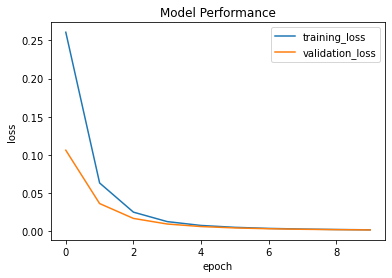

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()